In [8]:
import pandas as pd
import numpy as np
import edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2
hfi = erk.get_hfi_returns()
er = erk.annualize_rets(hfi['2000':], 12)
cov = hfi['2000':].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/paulhake/Documents/claude_code_class/notebooks_and_codem01_v02/nb/edhec_risk_ph.py:124: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv(file_path, header=0, parse_dates=True, index_col=0)


In [13]:
er_dist = er['Distressed Securities']

In [ ]:
#q1
# Load EDHEC data and calculate Monthly Parametric Gaussian VaR
hfi = erk.get_hfi_returns()
hfi_2000 = hfi['2000':]

# Get Distressed Securities returns
distressed = hfi_2000['Distressed Securities']

# Calculate Monthly Parametric Gaussian VaR at 1% level
var_gaussian_monthly = erk.var_gaussian(distressed, level=1, modified=False)

print(f"Monthly Parametric Gaussian VaR at 1% level for Distressed Securities: {var_gaussian_monthly:.4f}")

Monthly Parametric Gaussian VaR at 1% level for Distressed Securities: 0.0314


/Users/paulhake/Documents/claude_code_class/notebooks_and_codem01_v02/nb/edhec_risk_ph.py:124: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv(file_path, header=0, parse_dates=True, index_col=0)


In [ ]:

erk.var_gaussian(er_dist,level=1,modified=False)

np.float64(-0.08083685644055194)

In [18]:
#q2
hfi_dist = hfi['2000':]['Distressed Securities']  # This is the time series
erk.var_gaussian(hfi_dist, level=1, modified=True)

np.float64(0.04966909110627921)

In [19]:
#q3
erk.var_historic(hfi_dist, level=1)

np.float64(0.04264199999999999)

In [20]:
import pandas as pd
import numpy as np
import edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['2013':'2017'], 12)
cov = ind['2013':'2017'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: xlabel='Volatility', ylabel='Return'>

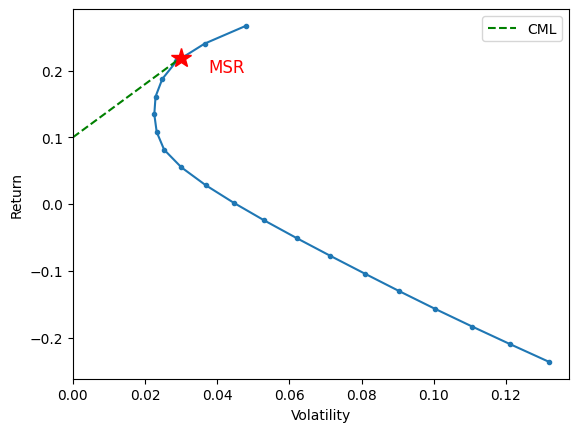

In [22]:
erk.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1)

In [21]:
l = ["Books","Steel","Oil","Mines"]
erk.msr(0.1, er[l], cov.loc[l,l])

array([5.17294541e-15, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [23]:
er[l]

Books    0.095312
Steel    0.100716
Oil      0.025275
Mines    0.005136
dtype: float64

In [25]:
# Q4: Calculate EW Portfolio weights
l = ["Books","Steel","Oil","Mines"]
n_assets = len(l)
ew_weights = np.repeat(1/n_assets, n_assets)
ew_portfolio = pd.Series(ew_weights, index=l)
print("Equal-Weighted Portfolio:")
print(ew_portfolio)
print(f"\nWeight of Steel in EW Portfolio: {ew_portfolio['Steel']}")

Equal-Weighted Portfolio:
Books    0.25
Steel    0.25
Oil      0.25
Mines    0.25
dtype: float64

Weight of Steel in EW Portfolio: 0.25


In [26]:
# Calculate GMV Portfolio weights
l = ["Books","Steel","Oil","Mines"]
gmv_weights = erk.gmv(cov.loc[l,l])
gmv_portfolio = pd.Series(gmv_weights, index=l)
print("Global Minimum Variance Portfolio:")
print(gmv_portfolio)
print(f"\nWeight of largest component: {gmv_portfolio.max()}")
print(f"Largest component: {gmv_portfolio.idxmax()}")

Global Minimum Variance Portfolio:
Books    4.770249e-01
Steel    2.168404e-19
Oil      4.341120e-01
Mines    8.886310e-02
dtype: float64

Weight of largest component: 0.4770248730422575
Largest component: Books


In [27]:
# Count non-zero weights in GMV portfolio
threshold = 1e-10
non_zero_count = (gmv_portfolio > threshold).sum()
print(f"Number of non-zero components in GMV portfolio: {non_zero_count}")
print(f"\nComponents with non-zero weights:")
print(gmv_portfolio[gmv_portfolio > threshold])

Number of non-zero components in GMV portfolio: 3

Components with non-zero weights:
Books    0.477025
Oil      0.434112
Mines    0.088863
dtype: float64


In [29]:
# First check the data structure
print("Index type:", type(ind.index))
print("Sample index values:", ind.index[:5])
print("\nDate range:", ind.index.min(), "to", ind.index.max())

Index type: <class 'pandas.core.indexes.period.PeriodIndex'>
Sample index values: PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11'], dtype='period[M]')

Date range: 1926-07 to 2018-12


In [30]:
# Calculate 2018 volatility using GMV and MSR weights from 2013-2017
l = ["Books","Steel","Oil","Mines"]

# Get 2018 covariance matrix - filter by year
ind_2018 = ind[ind.index.year == 2018]
cov_2018 = ind_2018[l].cov()

# Calculate portfolio volatilities (monthly)
msr_weights = erk.msr(0.1, er[l], cov.loc[l,l])
gmv_weights = erk.gmv(cov.loc[l,l])

vol_msr_monthly = erk.portfolio_vol(msr_weights, cov_2018)
vol_gmv_monthly = erk.portfolio_vol(gmv_weights, cov_2018)

# Annualize the volatilities
vol_msr_annual = vol_msr_monthly * np.sqrt(12)
vol_gmv_annual = vol_gmv_monthly * np.sqrt(12)

print(f"Annualized volatility of MSR portfolio over 2018: {vol_msr_annual:.4f}")
print(f"Annualized volatility of GMV portfolio over 2018: {vol_gmv_annual:.4f}")

Annualized volatility of MSR portfolio over 2018: 0.2198
Annualized volatility of GMV portfolio over 2018: 0.1897
